In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

#This dataset is made up of 1797 8x8 images. 
#Each image, like the one shown below, is of a hand-written digit. 

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

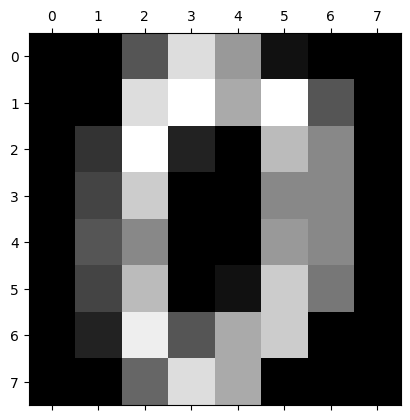

In [6]:
plt.gray()
plt.matshow(digits.images[0])  #It will print the corresponding data

In [ ]:
 #to print 0,1,2,3,4

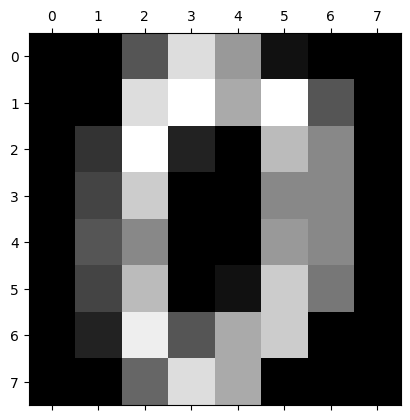

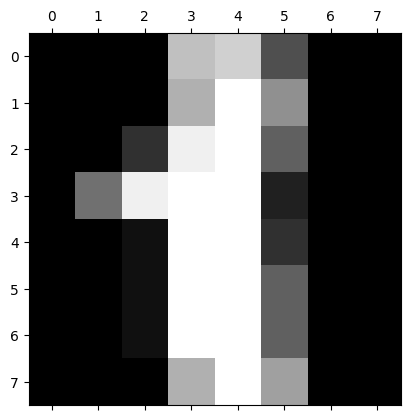

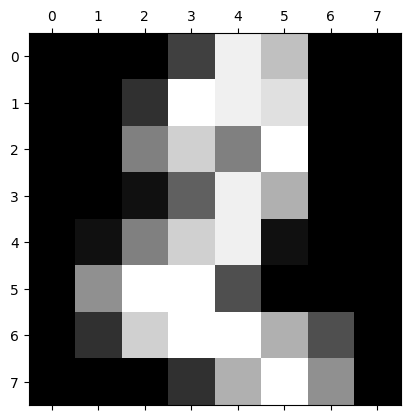

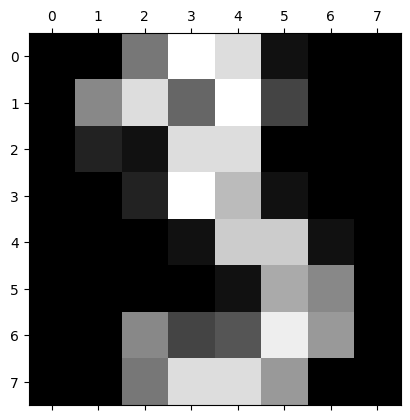

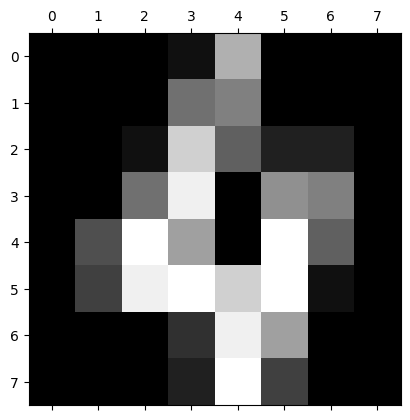

In [8]:
for i in range(5):
    plt.matshow(digits.images[i])

In [9]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)  #20% for dataset for the test and 80% for the training

In [12]:
#we don't want to overfit our model. we just bias it against the training data thats why the data that the model is trained against should be different than the model is tested  t

In [13]:
len(X_train) 

1347

In [14]:
len(X_test)

450

In [15]:
#Creating Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [16]:
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#Testing the accuracy of the model.
model.score(X_test, y_test)

0.9711111111111111

This model is 97.11% accurate.

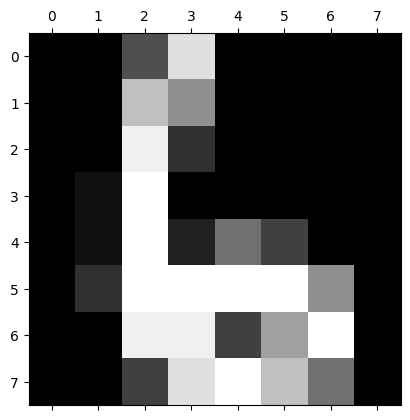

In [19]:
plt.matshow(digits.images[67])

In [20]:
digits.target[67]   #index=67

6

In [23]:
model.predict([digits.data[67]])

array([6])

In [24]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

#To see where exactly the model fails we have to use confusion matrix.

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.



In [25]:
y_predicted = model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 44,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  1,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 52]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

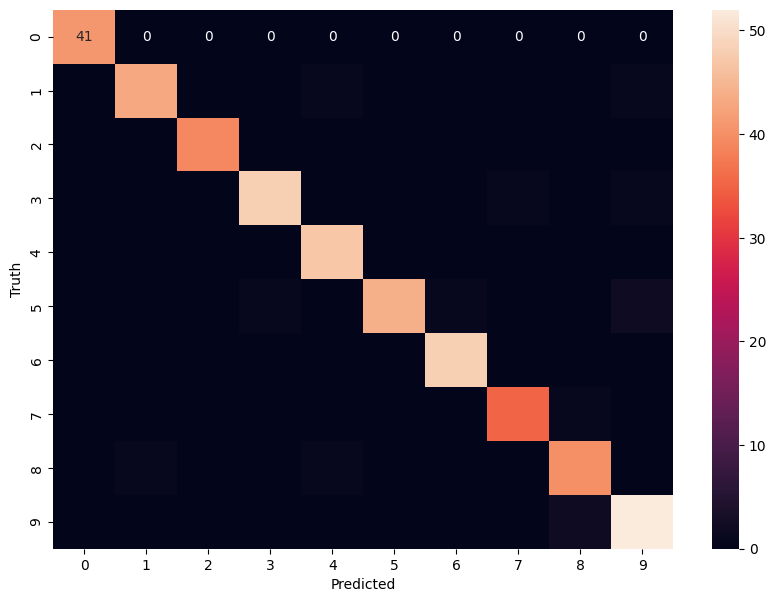

In [30]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')